In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys 
import os
sys.path.append(os.path.abspath("../../analysis_scripts/"))
import calibration_tools as tools

### Calibrating the TIP3P results

In [2]:
files = ['../sams/tip3p/out1.nc', '../sams/tip3p/out2.nc', '../sams/tip3p/out3.nc']
t3p = tools.AutoAnalyzeCalibration(files)

### Calibrating the TIP4Pew results

In [3]:
files = ['../sams/tip4pew/out1.nc', '../sams/tip4pew/out2.nc', '../sams/tip4pew/out3.nc']
t4p = tools.AutoAnalyzeCalibration(files)

## Plotting the calibration curves for these data

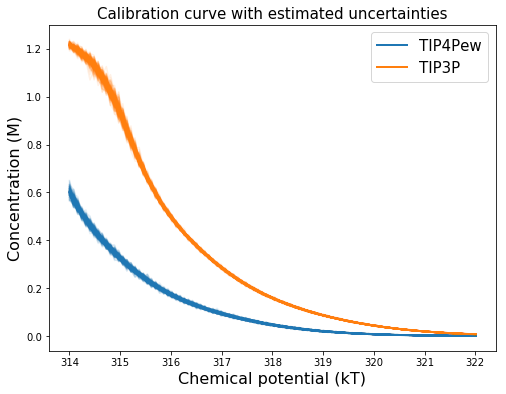

In [4]:
mu = np.linspace(314,322, 100)
nsamples = 200

# Predict the concentrations using the above calibration data
t3p_conc, t3p_spread = t3p.predict_ensemble_concentrations(mu, nsamples)
t4p_conc, t4p_spread = t4p.predict_ensemble_concentrations(mu, nsamples)


plt.figure(figsize=[8,6])
plt.plot(mu, t4p_conc, color='C0', label='TIP4Pew', lw=2)
plt.plot(mu, t4p_spread, color='C0',alpha=0.1)
plt.plot(mu, t3p_conc, color='C1', label='TIP3P', lw=2)
plt.plot(mu, t3p_spread, color='C1',alpha=0.1)

plt.xlabel('Chemical potential (kT)', fontsize=16)
plt.ylabel('Concentration (M)', fontsize=16)
plt.title('Calibration curve with estimated uncertainties', fontsize=15)
plt.legend(fontsize=15)
plt.show()